# **Passenger Prediction - LSTM**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

In [2]:
!git clone https://github.com/illliyas/Machine-Learning.git

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 1649, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 1649 (delta 35), reused 6 (delta 2), pack-reused 1583
Receiving objects: 100% (1649/1649), 303.75 MiB | 15.16 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Checking out files: 100% (1539/1539), done.


In [4]:
data = pd.read_csv('Machine-Learning/RNN/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)
data = data['passengers']
data=np.array(data).reshape(-1,1)

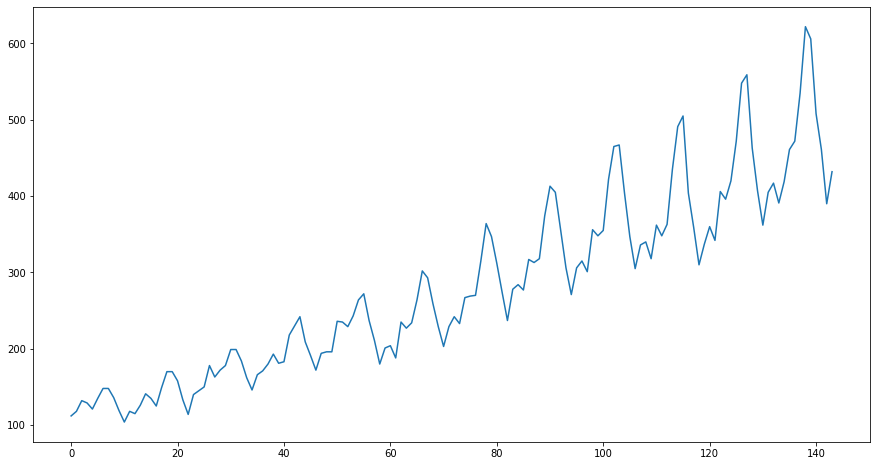

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(data)

**Feature** **Scaling**

In [ ]:
scaler= MinMaxScaler()
data=scaler.fit_transform(data)

In [ ]:
train_size = int(len(data)*0.70)
test_size = len(data) - train_size
train = data[0:train_size,:]
test = data[train_size:len(data),:]
print('train_size : {}, test_size : {}'.format(len(train),len(test)))

train_size : 100, test_size : 44


In [ ]:
train=data[0:train_size,:]
test=data[train_size:,:]

In [ ]:
train.shape

(100, 1)

In [ ]:
test.shape

(44, 1)

In [ ]:
def get_data(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(data[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 10
X_train, y_train = get_data(train, look_back)

In [ ]:
X_test, y_test = get_data(test, look_back)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [ ]:
X_train.shape

(89, 1, 10)

In [ ]:
97 = No of samples
1 = feature
2 = time steps


In [ ]:
look_back

10

**LSTM**

In [ ]:
model = Sequential()
model.add(LSTM(10, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10)                840       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
89/89 [==============================] - 2s 2ms/step - loss: 0.0177
Epoch 2/50
89/89 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 3/50
89/89 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 4/50
89/89 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 5/50
89/89 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 6/50
89/89 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 7/50
89/89 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 8/50
89/89 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 9/50
89/89 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 10/50
89/89 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 11/50
89/89 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 12/50
89/89 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 13/50
89/89 [==============================

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
scaler.scale_

array([0.0019305])

In [ ]:
y_pred = scaler.inverse_transform(y_pred)

In [ ]:
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

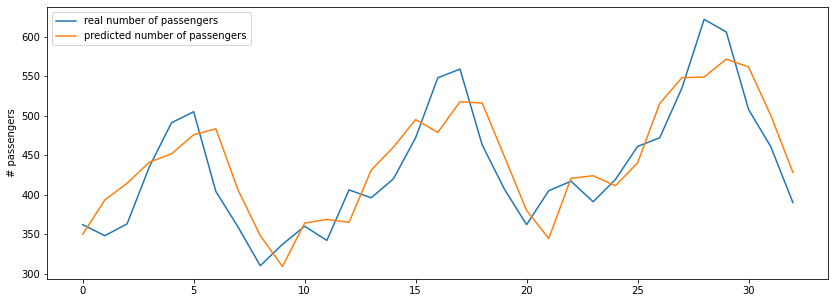

In [ ]:
# plot baseline and predictions
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('# passengers')
plt.legend()
plt.show()

In [ ]:
testScore = math.sqrt(mean_squared_error(y_test, y_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 40.78 RMSE
